## 1.데이터 불러오기

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

!pip install pyforest
import pyforest

Mounted at /content/gdrive/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=2a8e203cd7e8b69a30ed2bea46eda84e214d481bcb170dd68cf484aecba1f245
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


### 1-1 그래프에 한글 폰트 적용하기
명령어 실행 후 런타임 다시 시작

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,628 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [5]:
train = pd.read_csv("/content/gdrive/MyDrive/Colab_Files/week#5/LSTM Project/train_data.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Colab_Files/week#5/LSTM Project/test_data.csv")
topic_dict = pd.read_csv('//content/gdrive/MyDrive/Colab_Files/week#5/LSTM Project/topic_dict.csv')
submission = pd.read_csv("/content/gdrive/MyDrive/Colab_Files/week#5/LSTM Project/sample_submission.csv")

train


,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


### 1-2 데이터확인

train 데이터 확인

test 데이터 확인

In [8]:
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


topic_dict 확인

In [7]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


submission 데이터 확인

In [9]:
submission

,index,topic_idx
0,45654,0
1,45655,0
2,45656,0
3,45657,0
4,45658,0
...,...,...
9126,54780,0
9127,54781,0
9128,54782,0
9129,54783,0


topic 데이터 갯수 파악

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


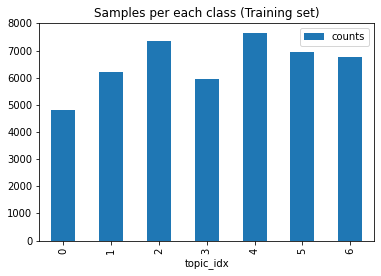

In [10]:
train.groupby(train.topic_idx).size().reset_index(name="counts").plot.bar(x='topic_idx',title="Samples per each class (Training set)")


## 2.토큰화

한국어 토큰화 라이브러리 konlpy 설치

In [11]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
     |████████████████████████████████| 448 kB 56.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.utils import to_categorical

In [13]:
from tqdm import tqdm

품사 토큰화

In [14]:
# 먼저 train 데이터와 test 데이터 인덱스 없이 배열로 만들기
X_train = np.array([x for x in train['title']])
X_test = np.array([x for x in test['title']])
Y_train = np.array([x for x in train['topic_idx']])

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(45654,)
(9131,)
(45654,)


In [15]:
okt = Okt()
okt.pos('여름이라서 너무 덥다 차가운 아이스크림이 먹고 싶다')

[('여름', 'Noun'),
 ('이라서', 'Josa'),
 ('너무', 'Adverb'),
 ('덥다', 'Adjective'),
 ('차가운', 'Adjective'),
 ('아이스크림', 'Noun'),
 ('이', 'Josa'),
 ('먹고', 'Verb'),
 ('싶다', 'Verb')]

In [16]:
okt.pos('노력을 이기는 재능은 없고 노력을 외면하는 결과도 없다')

[('노력', 'Noun'),
 ('을', 'Josa'),
 ('이기는', 'Verb'),
 ('재능', 'Noun'),
 ('은', 'Josa'),
 ('없고', 'Adjective'),
 ('노력', 'Noun'),
 ('을', 'Josa'),
 ('외면', 'Noun'),
 ('하는', 'Verb'),
 ('결과', 'Noun'),
 ('도', 'Josa'),
 ('없다', 'Adjective')]

[한국어 품사 태그 비교 차트](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)

위의 사이트에서 어떤 품사 있는지 찾아보고 필요 없는 품사를 제외시키는 함수를 만들어보자!

품사로 토큰화 하지 않고 명사, 형태소로 토큰화해도 상관없음(네이버 리뷰 참조)

In [17]:
okt_except_pos = [
    'Determiner',
    'Conjunction',
    'Exclamation',
    '더 추가하기!'
]

def apply_konlpy_okt(df):
    okt = Okt()
    data = []
    
    for idx, sentence in enumerate(tqdm(df)):
        temp = okt.pos(sentence, stem=True, norm=True)
        temp = [data[0] for data in temp if data[1] not in okt_except_pos]
        data.append(" ".join(temp))
    return data

In [18]:
tokenized_list = apply_konlpy_okt(train['title'])

100%|██████████| 45654/45654 [01:32<00:00, 495.24it/s]


토큰화된 데이터로 새로운 데이터 프레임 만들고 title이 비어있는 행 지우기

In [19]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

45654 9131


In [20]:
# Tokenizer
from keras.preprocessing.text import Tokenizer
vocab_size = 2000  

tokenizer = Tokenizer(num_words = vocab_size)  
  # Tokenizer 는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 
  # num_words 에 지정된 만큼만 숫자로 반환하고, 나머지는 0 으로 반환합니다                 
tokenizer.fit_on_texts(X_train) # Tokenizer 에 데이터 실제로 입력
sequences_train = tokenizer.texts_to_sequences(X_train)    # 문장 내 모든 단어를 시퀀스 번호로 변환
sequences_test = tokenizer.texts_to_sequences(X_test)      # 문장 내 모든 단어를 시퀀스 번호로 변환

print(len(sequences_train), len(sequences_test))

45654 9131


In [21]:
import numpy as np
from keras.utils import np_utils

# 종속변수 데이터 전처리
train_y = np_utils.to_categorical(Y_train) # Y_train 에 원-핫 인코딩
print(train_y)
print(train_y.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(45654, 7)


비어있는 title 확인

In [23]:
vocab_size = 2000 # 제일 많이 사용하는 사이즈
embedding_dim = 200  
max_length = 14    # 위에서 그래프 확인 후 정함
padding_type='post'
#oov_tok = "<OOV>"
train_x = pad_sequences(sequences_train, padding='post', maxlen=max_length)
test_x = pad_sequences(sequences_test, padding=padding_type, maxlen=max_length)

print(train_x.shape, test_x.shape)

(45654, 14) (9131, 14)


In [24]:
# 양방향 LSTM 레이어를 사용한 모델 (model3) 정의
model3 = Sequential([Embedding(vocab_size, embedding_dim, input_length =max_length),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64, return_sequences = True)),
        tf.keras.layers.Bidirectional(LSTM(units = 64)),
        Dense(7, activation='softmax')    # 결과값이 0~4 이므로 Dense(5)
    ])
    
model3.compile(loss= 'categorical_crossentropy', #여러개 정답 중 하나 맞추는 문제이므로 손실 함수는 categorical_crossentropy
              optimizer= 'adam',
              metrics = ['accuracy']) 
model3.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 14, 200)           400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 14, 128)           135680    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 14, 128)           98816     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 734,215
Trainable params: 734,215
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델 실행해보기
history = model3.fit(train_x, train_y, epochs=50, batch_size=100, validation_split= 0.2) 
  # 양방향 LSTM 레이어에서는 batch size 를 100으로 잡고 50회 학습 해보았다.

Epoch 1/50
366/366 [==============================] - 71s 156ms/step - loss: 1.0673 - accuracy: 0.6077 - val_loss: 1.2136 - val_accuracy: 0.5420
Epoch 2/50
366/366 [==============================] - 55s 149ms/step - loss: 0.7715 - accuracy: 0.7347 - val_loss: 1.1089 - val_accuracy: 0.5901
Epoch 3/50
366/366 [==============================] - 54s 148ms/step - loss: 0.7254 - accuracy: 0.7493 - val_loss: 1.1684 - val_accuracy: 0.5605
Epoch 4/50
366/366 [==============================] - 53s 144ms/step - loss: 0.7013 - accuracy: 0.7545 - val_loss: 1.1943 - val_accuracy: 0.5505
Epoch 5/50
366/366 [==============================] - 53s 144ms/step - loss: 0.6792 - accuracy: 0.7584 - val_loss: 1.0917 - val_accuracy: 0.5861
Epoch 6/50
366/366 [==============================] - 53s 144ms/step - loss: 0.6640 - accuracy: 0.7630 - val_loss: 1.1194 - val_accuracy: 0.5848
Epoch 7/50
366/366 [==============================] - 52s 143ms/step - loss: 0.6469 - accuracy: 0.7681 - val_loss: 1.1951 - val_ac

새로운 데이터 프레임 출력

<function matplotlib.pyplot.show>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


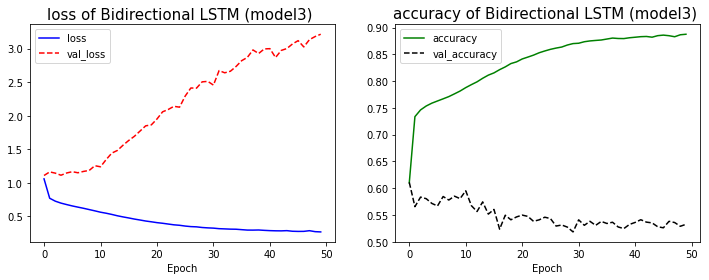

In [26]:
# 모델 학습 결과 확인
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('loss of Bidirectional LSTM (model3) ', fontsize= 15)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy of Bidirectional LSTM (model3) ', fontsize= 15)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

토픽별로 데이터가 몇 개 있는지 그래프 그려보기

In [27]:
# 계층 교차 검증
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, Y_train), 1):
    print(f'training model for CV #{i}')

    model3.fit(train_x[i_trn], 
            to_categorical(Y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(Y_train[i_val])),
            epochs=10,
            batch_size=512)

<IPython.core.display.Javascript object>

training model for CV #1
Epoch 1/10
72/72 [==============================] - 3s 41ms/step - loss: 0.6584 - accuracy: 0.8207 - val_loss: 0.5848 - val_accuracy: 0.8270
Epoch 2/10
72/72 [==============================] - 2s 24ms/step - loss: 0.4778 - accuracy: 0.8431 - val_loss: 0.5638 - val_accuracy: 0.8300
Epoch 3/10
72/72 [==============================] - 2s 23ms/step - loss: 0.4238 - accuracy: 0.8535 - val_loss: 0.5627 - val_accuracy: 0.8263
Epoch 4/10
72/72 [==============================] - 2s 29ms/step - loss: 0.3950 - accuracy: 0.8592 - val_loss: 0.5688 - val_accuracy: 0.8228
Epoch 5/10
72/72 [==============================] - 2s 23ms/step - loss: 0.3747 - accuracy: 0.8629 - val_loss: 0.5766 - val_accuracy: 0.8209
Epoch 6/10
72/72 [==============================] - 2s 23ms/step - loss: 0.3594 - accuracy: 0.8665 - val_loss: 0.5914 - val_accuracy: 0.8166
Epoch 7/10
72/72 [==============================] - 2s 23ms/step - loss: 0.3465 - accuracy: 0.8687 - val_loss: 0.6000 - val_accur

한 문장에 몇개의 단어가 있는지 그래프로 확인하고 데이터프레임에서 평균, 표준편차 등 정보를 출력하기

In [29]:
# 계층 교차 검증
n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

# 테스트데이터의 예측값 담을 곳 생성
test_y = np.zeros((test_x.shape[0], 7))

# 조기 종료 옵션 추가
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                   verbose=1, mode='min', baseline=None, restore_best_weights=True)

for i, (i_trn, i_val) in enumerate(cv.split(train_x, Y_train), 1):
    print(f'training model for CV #{i}')

    model3.fit(train_x[i_trn], 
            to_categorical(Y_train[i_trn]),
            validation_data=(train_x[i_val], to_categorical(Y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[es])     # 조기 종료 옵션
                      
    test_y += model3.predict(test_x) / n_fold    # 나온 예측값들을 교차 검증 횟수로 나눈다

<IPython.core.display.Javascript object>

training model for CV #1
Epoch 1/10
72/72 [==============================] - 2s 23ms/step - loss: 0.3043 - accuracy: 0.8736 - val_loss: 0.2967 - val_accuracy: 0.8803
Epoch 2/10
72/72 [==============================] - 2s 21ms/step - loss: 0.2983 - accuracy: 0.8763 - val_loss: 0.3085 - val_accuracy: 0.8734
Epoch 3/10
72/72 [==============================] - 2s 21ms/step - loss: 0.2870 - accuracy: 0.8795 - val_loss: 0.3168 - val_accuracy: 0.8722
Epoch 4/10
72/72 [==============================] - 2s 21ms/step - loss: 0.2811 - accuracy: 0.8807 - val_loss: 0.3292 - val_accuracy: 0.8665
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
training model for CV #2
Epoch 1/10
72/72 [==============================] - 2s 22ms/step - loss: 0.2997 - accuracy: 0.8754 - val_loss: 0.2884 - val_accuracy: 0.8802
Epoch 2/10
72/72 [==============================] - 2s 27ms/step - loss: 0.2887 - accuracy: 0.8787 - val_loss: 0.2984 - val_accuracy: 0.8739
Epoch 3/10
72/72 [==

단어 갯수와 문장 길이 설정하기

In [30]:
topic = []
for i in range(len(test_y)):
    topic.append(np.argmax(test_y[i]))

모델에 입력할 데이터(X) 만들기

In [31]:
submission['topic_idx'] = topic
submission

,index,topic_idx
0,45654,2
1,45655,3
2,45656,1
3,45657,1
4,45658,3
...,...,...
9126,54780,2
9127,54781,3
9128,54782,0
9129,54783,0


In [33]:
submission.to_csv('/content/gdrive/MyDrive/Colab_Files/week#5/LSTM Project/Final.csv',index = False)
